<a href="https://colab.research.google.com/github/hubcborja/Proyecto_DataMining_NN/blob/main/Graficacion_red_convenios_Doble_Tributacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graficación de convenios doble tributación

## Importación librerías

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Importación datos

Obtenidos de https://www.treaties.tax/en/

ICTD (2021). Tax Treaties Explorer [Online database], Brighton: International Centre for Tax and Development (ICTD), retrieved from https://www.treaties.tax

In [9]:
base_convenios=pd.read_csv('https://raw.githubusercontent.com/hubcborja/Trabajo_grado_ECIJG/refs/heads/main/bases_datos/convenios_tributarios.csv')
base_convenios.head()

,Country A,Country B,Type,Date of signature,Effective,Status,Source,WHTrates,PE,Other,...,12(2)E,12(A),13(4),13(5),14,16(2),21(3),25B(5),27,29
0,Albania,Israel,Original,2021,2022.0,In Force,0.30,0.31,0.45,0.13,...,5,0,YES,NO,NO,NO,NO,NO,NO,PPT
1,Albania,Turkey,Original,1994,1997.0,In Force,0.19,0.38,0.06,0.13,...,10,0,NO,NO,YES,NO,NO,NO,NO,NaN
2,Albania,Romania,Original,1994,1995.0,In Force,0.47,0.47,0.58,0.38,...,15,0,NO,NO,YES,NO,YES,NO,NO,NaN
3,Albania,Italy,Original,1994,2000.0,In Force,0.19,0.25,0.19,0.13,...,5,0,NO,NO,YES,NO,NO,NO,NO,NaN
4,Albania,Russia,Original,1995,1998.0,In Force,0.23,0.38,0.06,0.25,...,10,0,NO,NO,YES,NO,YES,NO,NO,NaN


In [ ]:
base_convenios.columns

Index(['Country A', 'Country B', 'Type', 'Date of signature', 'Effective',
       'Status', 'Source', 'WHTrates', 'PE', 'Other', 'UN', '5(3)(a)C',
       '5(3)(a)S', '5(3)(b)', '5(4)(a)', '5(4)(b)', '5(5)(b)', '5(6)', '5(7)',
       '7(1)(b&c)', '7(3)', '8(2)', '10(2)(a)Q', '10(2)(a)T', '10(2)(b)',
       '11(2)', '11(2)F', '12(2)', '12(2)C', '12(2)E', '12(A)', '13(4)',
       '13(5)', '14', '16(2)', '21(3)', '25B(5)', '27', '29'],
      dtype='object')

In [ ]:
base_convenios.loc[(base_convenios['Country A']=='Peru') | (base_convenios['Country B']=='Peru')]

,Country A,Country B,Type,Date of signature,Effective,Status,Source,WHTrates,PE,Other,...,12(2)E,12(A),13(4),13(5),14,16(2),21(3),25B(5),27,29
453,Brazil,Peru,Original,2006,2010.0,In Force,0.52,0.72,0.34,0.50,...,15,15,YES,YES,YES,NO,YES,NO,NO,LOB
529,Canada,Peru,Original,2001,2004.0,In Force,0.46,0.53,0.47,0.38,...,15,0,YES,NO,YES,NO,YES,NO,NO,OTHER
555,Chile,Peru,Amended by protocol,2002,2004.0,In Force,0.46,0.53,0.47,0.38,...,15,0,NO,YES,YES,NO,YES,NO,NO,NaN
1274,Japan,Peru,Original,2019,2022.0,In Force,0.47,0.44,0.47,0.50,...,15,0,YES,YES,YES,NO,YES,NO,YES,OTHER
1346,South Korea,Peru,Original,2012,2015.0,In Force,0.53,0.63,0.47,0.50,...,15,10,YES,YES,YES,NO,YES,NO,NO,PARTIAL
1544,Mexico,Peru,Original,2011,2015.0,In Force,0.63,0.53,0.84,0.50,...,15,0,YES,YES,YES,NO,YES,NO,NO,PARTIAL
1752,Peru,Switzerland,Original,2012,2015.0,In Force,0.51,0.63,0.47,0.43,...,15,10,YES,YES,YES,NO,NaN,NO,NO,NaN
1753,Peru,Portugal,Original,2012,2015.0,In Force,0.53,0.50,0.59,0.50,...,15,0,YES,YES,YES,NO,YES,NO,NO,PPT


# Grafo general de los convenios para evitar la doble tributación

In [ ]:
G = nx.from_pandas_edgelist(base_convenios,
                            source='Country A',
                            target='Country B',
                            edge_attr='Date of signature')

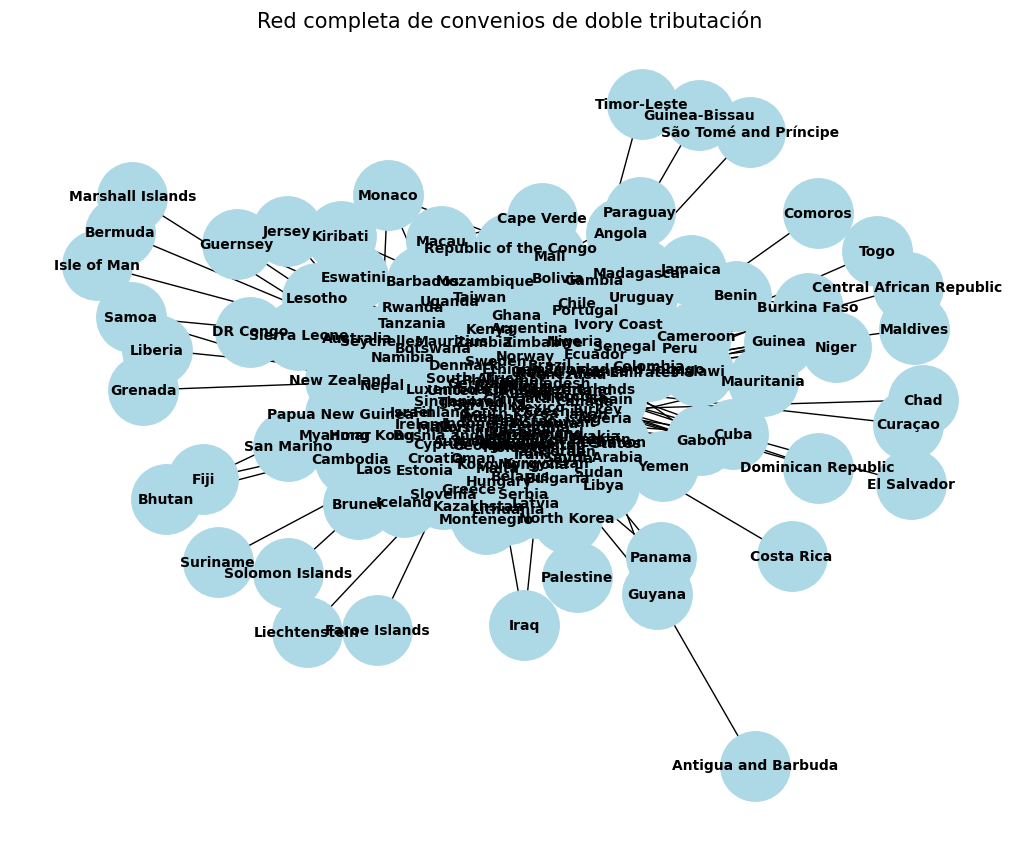

In [ ]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10, font_weight='bold')
plt.title("Red completa de convenios de doble tributación", size=15)
plt.show()

## Subgrafo para los paises con más volumen comercial actual con Colombia

Datos sacados del DANE

https://www.dane.gov.co/index.php/estadisticas-por-tema/comercio-internacional/exportaciones

In [ ]:
# Lista de nodos para el subgrafo
paises_subgrafo = ['Colombia', 'United States', 'Panama', 'China', 'India', 'Brazil', 'Ecuador', 'Netherlands', 'Mexico', 'Turkey',
                   'Chile', 'Peru', 'Spain', 'Italy', 'South Korea', 'Canada', 'Germany', 'Venezuela', 'Dominican Republic',
                   'Belgium', 'Japan', 'Israel', 'United Kingdom']

# Crear el subgrafo
subgrafo = G.subgraph(paises_subgrafo)


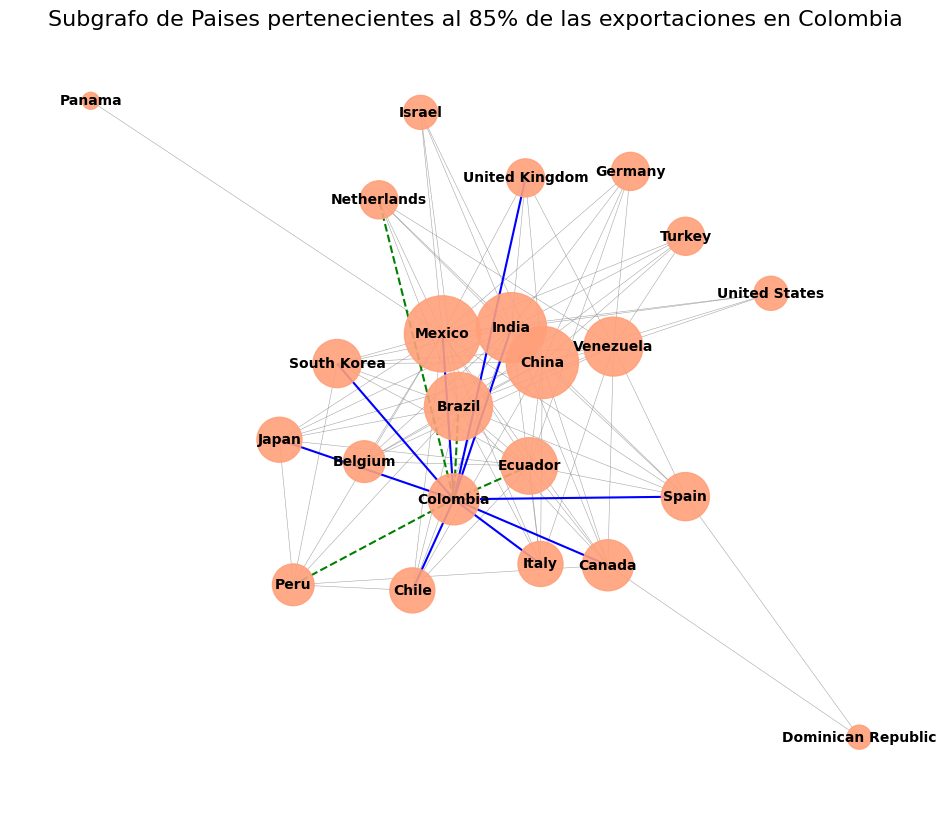

In [ ]:
nodo_colombia='Colombia'

node_degrees = dict(subgrafo.degree())
# Escalar los tamaños: Multiplica por un factor para que sean visualmente distintos
node_sizes = [v * 150 for v in node_degrees.values()]

# 2. AJUSTAR EL LAYOUT (Aumentar la Repulsión)
# k=0.35 a k=0.5 suele funcionar bien para separar nodos densos
pos = nx.spring_layout(subgrafo, k=0.4, iterations=100, seed=42)

colombia_edges = [(u, v) for u, v in subgrafo.edges() if u == nodo_colombia or v == nodo_colombia]
# 3. DIBUJAR CON ESTILOS MEJORADOS
plt.figure(figsize=(12, 10))

# Nodos: Tamaño por Grado, Color por Continente/Grupo de interés (ej. rojo para LATAM)
nx.draw_networkx_nodes(
    subgrafo, pos,
    node_size=node_sizes,
    node_color='lightsalmon',  # Color más suave
    alpha=0.9
)

# Enlaces: Reducir grosor y opacidad para mayor claridad
nx.draw_networkx_edges(
    subgrafo, pos,
    width=0.4,  # Grosor muy delgado
    alpha=0.7,  # Opacidad baja
    edge_color='gray'
)

nx.draw_networkx_edges(
    subgrafo, pos,
    edgelist=colombia_edges,  # Solo los enlaces de Colombia
    width=1.5,                # Grosor muy notorio
    alpha=1.0,                # Opacidad total
    edge_color='blue',        # Color de resalte (ej. azul o rojo vibrante)
    style='solid'             # Línea continua
)

nuevas_aristas = [
    ('Colombia', 'Peru'),
    ('Colombia', 'Brazil'),
    ('Colombia', 'Ecuador'),
    ('Colombia', 'Netherlands')
]

nx.draw_networkx_edges(
    subgrafo, pos,
    edgelist=nuevas_aristas,
    width=1.5,                # Grosor muy notorio
    alpha=1.0,
    edge_color='green',       # Color de resalte
    style='dashed'            # Usamos línea punteada/discontinua para indicar que son 'futuras' o 'hipotéticas'
)

# Etiquetas: Texto más claro
nx.draw_networkx_labels(
    subgrafo, pos,
    font_size=10,
    font_weight='bold',
    font_color='black'
)

plt.title("Subgrafo de Paises pertenecientes al 85% de las exportaciones en Colombia", fontsize=16)
plt.axis('off') # Ocultar los ejes
plt.show()

In [ ]:
paises_subgrafo = ['Colombia', 'United States', 'China', 'Brazil', 'Mexico', 'Germany', 'France', 'India', 'Japan',
                   'Argentina', 'Spain', 'Italy', 'Canada', 'Vietnam', 'South Korea', 'Peru', 'Ecuador',
                   'Chile', 'United Kingdom']

# Crear el subgrafo
subgrafo = G.subgraph(paises_subgrafo)

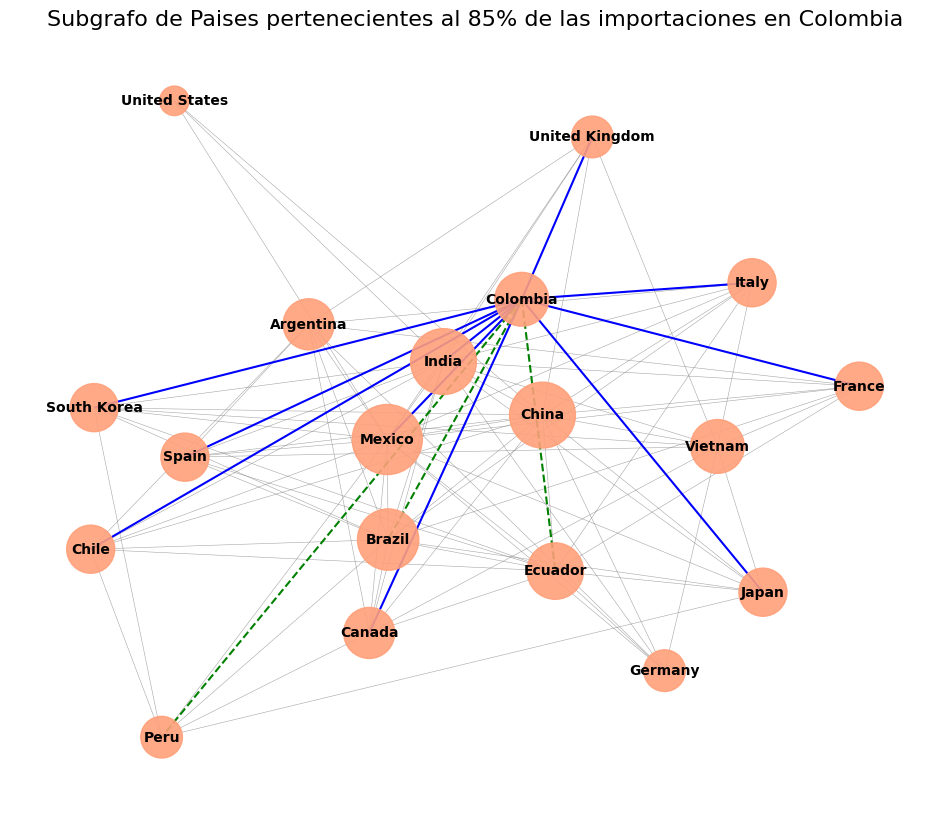

In [ ]:
node_degrees = dict(subgrafo.degree())
# Escalar los tamaños: Multiplica por un factor para que sean visualmente distintos
node_sizes = [v * 150 for v in node_degrees.values()]



# 2. AJUSTAR EL LAYOUT (Aumentar la Repulsión)
# k=0.35 a k=0.5 suele funcionar bien para separar nodos densos
pos = nx.spring_layout(subgrafo, k=0.4, iterations=50, seed=42)

colombia_edges = [(u, v) for u, v in subgrafo.edges() if u == nodo_colombia or v == nodo_colombia]
# 3. DIBUJAR CON ESTILOS MEJORADOS
plt.figure(figsize=(12, 10))

# Nodos: Tamaño por Grado, Color por Continente/Grupo de interés (ej. rojo para LATAM)
nx.draw_networkx_nodes(
    subgrafo, pos,
    node_size=node_sizes,
    node_color='lightsalmon',  # Color más suave
    alpha=0.9
)

# Enlaces: Reducir grosor y opacidad para mayor claridad
nx.draw_networkx_edges(
    subgrafo, pos,
    width=0.4,  # Grosor muy delgado
    alpha=0.7,  # Opacidad baja
    edge_color='gray'
)

nx.draw_networkx_edges(
    subgrafo, pos,
    edgelist=colombia_edges,  # Solo los enlaces de Colombia
    width=1.5,                # Grosor muy notorio
    alpha=1.0,                # Opacidad total
    edge_color='blue',        # Color de resalte (ej. azul o rojo vibrante)
    style='solid'             # Línea continua
)

nuevas_aristas = [
    ('Colombia', 'Peru'),
    ('Colombia', 'Brazil'),
    ('Colombia', 'Ecuador')
]

nx.draw_networkx_edges(
    subgrafo, pos,
    edgelist=nuevas_aristas,
    width=1.5,                # Grosor muy notorio
    alpha=1.0,
    edge_color='green',       # Color de resalte
    style='dashed'            # Usamos línea punteada/discontinua para indicar que son 'futuras' o 'hipotéticas'
)

# Etiquetas: Texto más claro
nx.draw_networkx_labels(
    subgrafo, pos,
    font_size=10,
    font_weight='bold',
    font_color='black'
)

plt.title("Subgrafo de Paises pertenecientes al 85% de las importaciones en Colombia", fontsize=16)
plt.axis('off') # Ocultar los ejes
plt.show()

## Subgrafo paises vecinos de Colombia

Este grafo representa aquellos paises cercanos a Colombia y los acuerdos para evitar la doble tributación que tienen con otros paises

In [10]:
G = nx.from_pandas_edgelist(base_convenios,
                            source='Country A',
                            target='Country B')

nodo_principal = 'Colombia'

# Verificar que el nodo exista en el grafo
if nodo_principal not in G:
    print(f"Error: El nodo '{nodo_principal}' no existe en el grafo actual.")
else:
    # --- VECINOS DE PRIMER ORDEN (Grado 1) ---
    # Los vecinos directos son los países con los que Colombia tiene un CDT
    vecinos_primer_orden = set(G.neighbors(nodo_principal))

    print(f"--- Vecinos de Primer Orden de {nodo_principal} ---")
    print(f"Total: {len(vecinos_primer_orden)}")
    print(vecinos_primer_orden)


    # --- VECINOS DE SEGUNDO ORDEN (Grado 2) ---
    # Los vecinos de los vecinos directos (excluyendo a Colombia misma)
    vecinos_segundo_orden = set()

    # Iterar sobre cada vecino de primer orden
    for vecino in vecinos_primer_orden:
        # Obtener los vecinos del vecino actual
        vecinos_segundo_orden.update(G.neighbors(vecino))

    # Excluir los vecinos de primer orden y el nodo principal (COL)
    vecinos_segundo_orden = vecinos_segundo_orden - vecinos_primer_orden
    vecinos_segundo_orden.discard(nodo_principal) # Aseguramos que Colombia no esté en la lista


    print("\n--- Vecinos de Segundo Orden de COL (Excluyendo vecinos de Grado 1) ---")
    print(f"Total: {len(vecinos_segundo_orden)}")
    print(vecinos_segundo_orden)

--- Vecinos de Primer Orden de Colombia ---
Total: 13
{'Portugal', 'Czechia', 'Canada', 'Chile', 'India', 'United Kingdom', 'Italy', 'Switzerland', 'Spain', 'France', 'Japan', 'South Korea', 'Mexico'}

--- Vecinos de Segundo Orden de COL (Excluyendo vecinos de Grado 1) ---
Total: 140
{'Guinea', 'Australia', 'Peru', 'Netherlands', 'Dominican Republic', 'Serbia', 'Norway', 'Benin', 'Lithuania', 'Azerbaijan', 'Pakistan', 'Malaysia', 'Bolivia', 'Republic of the Congo', 'Panama', 'Sierra Leone', 'Mauritius', 'Mauritania', 'Egypt', 'Solomon Islands', 'Papua New Guinea', 'Central African Republic', 'Mali', 'Laos', 'Sweden', 'Myanmar', 'Finland', 'Sudan', 'Nigeria', 'Burkina Faso', 'Belarus', 'Saudi Arabia', 'Luxembourg', 'Senegal', 'Lesotho', 'United Arab Emirates', 'Hungary', 'Taiwan', 'Moldova', 'Armenia', 'Uganda', 'Fiji', 'Kenya', 'Morocco', 'Argentina', 'Denmark', 'Iceland', 'Gambia', 'Vietnam', 'Bangladesh', 'Albania', 'Malta', 'Qatar', 'Botswana', 'Tajikistan', 'Lebanon', 'Jordan', 'Sy

In [11]:
nodos_interes={nodo_principal} | vecinos_primer_orden
nodos_interes=nodos_interes | vecinos_segundo_orden

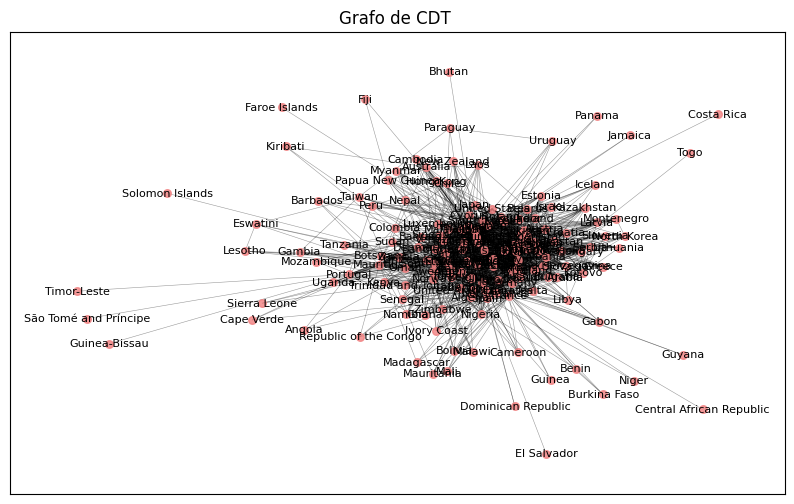

In [12]:
# Crear el subgrafo
subgrafo = G.subgraph(nodos_interes)
# 1. Calcular métrica para tamaño (ej. Degree)
node_degrees = dict(G.degree())
# Escalar el tamaño para la visualización
node_sizes = [v * 50 for v in node_degrees.values()]

# 2. Generar el layout
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
# 3. Dibujar el grafo
nx.draw_networkx_nodes(
    subgrafo, pos,
    node_size=30,
    node_color='lightcoral', # Cambiar color
    alpha=0.8
)
nx.draw_networkx_edges(
    subgrafo, pos,
    width=0.4,  # grosor
    alpha=0.4 #opacidad
)

nx.draw_networkx_labels(subgrafo, pos, font_size=8)
plt.title("Grafo de CDT ")
plt.show()

# Metricas del grafo para Colombia


In [13]:
metrics = {}

metrics['Degree'] = dict(subgrafo.degree())
metrics['ClosenessCentrality'] = nx.closeness_centrality(subgrafo)
metrics['BetweennessCentrality'] = nx.betweenness_centrality(subgrafo)
metrics['ClusteringCoefficient'] = nx.clustering(subgrafo)
metrics['Eccentricity'] = nx.eccentricity(subgrafo)
metrics['NeighborhoodConnectivity'] = nx.average_neighbor_degree(subgrafo)
metrics['Stress'] = nx.load_centrality(subgrafo)

# --- Métricas Globales (No por nodo, sino para la red completa) ---
try:
    avg_path = nx.average_shortest_path_length(subgrafo)
    print(f"AverageShortestPathLength: {avg_path}")
except nx.NetworkXError:
    # Esto ocurre si la red no está conectada (importante para tu tesis!)
    print("La red no está conectada, no se puede calcular ASPL.")

# --- Métricas Simples y de Estructura ---
print(f"NumberOfUndirectedEdges: {subgrafo.number_of_edges()}")
print(f"SelfLoops: {nx.number_of_selfloops(subgrafo)}")

# --- Conversión a DataFrame para integrar con atributos de nodo (OE2) ---
df_metrics = pd.DataFrame(metrics)
# El índice del DataFrame son los países (nodos)

print("\nDataFrame de Métricas Estructurales (Primeras filas):")
df_metrics.head()

AverageShortestPathLength: 2.017400899753841
NumberOfUndirectedEdges: 1903
SelfLoops: 0

DataFrame de Métricas Estructurales (Primeras filas):


,Degree,ClosenessCentrality,BetweennessCentrality,ClusteringCoefficient,Eccentricity,NeighborhoodConnectivity,Stress
Albania,43,0.570896,0.006831,0.234773,3,35.930233,0.006922
Israel,17,0.488818,0.000245,0.500000,3,59.470588,0.000245
Turkey,36,0.538732,0.004301,0.352381,3,48.222222,0.004247
Romania,37,0.538732,0.003362,0.348348,3,47.513514,0.003359
Italy,46,0.560440,0.009328,0.241546,3,41.478261,0.009275


# Coeficientes para la predicción de enlaces desde la red sin características exógenas


## Coeficiente de Jaccard

In [14]:
jaccard_scores = nx.jaccard_coefficient(subgrafo)

scores_list = []
for u, v, p in jaccard_scores:
    scores_list.append({'Pais_i': u, 'Pais_j': v, 'Jaccard_Score': p})

df_jaccard = pd.DataFrame(scores_list)
df_jaccard.sort_values(by=['Pais_i','Jaccard_Score'], ascending=[True, False], inplace=True)

In [15]:
df_jaccard[df_jaccard['Pais_i']=='Colombia']

,Pais_i,Pais_j,Jaccard_Score
2,Colombia,Peru,0.500000
81,Colombia,Ecuador,0.375000
113,Colombia,Trinidad and Tobago,0.333333
135,Colombia,Ivory Coast,0.333333
128,Colombia,Brazil,0.324324
...,...,...,...
68,Colombia,Croatia,0.030303
71,Colombia,Cyprus,0.029412
91,Colombia,Bulgaria,0.027027
30,Colombia,Belarus,0.025641


## Coeficiente de Adamic Adar

In [16]:
nodo_colombia='Colombia'

aa_scores_generator = nx.adamic_adar_index(subgrafo)

# 2. Convertir el generador en un DataFrame para análisis
scores_list = []
for u, v, score in aa_scores_generator:
    scores_list.append({
        'Pais_A': u,
        'Pais_B': v,
        'Adamic_Adar_Score': score
    })

df_adamic_adar = pd.DataFrame(scores_list)

# 3. Filtrar para ver solo las predicciones de Colombia
df_colombia_aa = df_adamic_adar[
    (df_adamic_adar['Pais_A'] == nodo_colombia) |
    (df_adamic_adar['Pais_B'] == nodo_colombia)
]

# 4. Ordenar para ver los países con mayor probabilidad de firmar un CDT
df_colombia_aa_sorted = df_colombia_aa.sort_values(
    by='Adamic_Adar_Score',
    ascending=False
)

print(f"--- Top 5 Países Candidatos para CDT con {nodo_colombia} (Según Adamic-Adar) ---")
df_colombia_aa_sorted

--- Top 5 Países Candidatos para CDT con Colombia (Según Adamic-Adar) ---


,Pais_A,Pais_B,Adamic_Adar_Score
99,Colombia,China,3.593753
117,Colombia,South Africa,3.593753
128,Colombia,Brazil,3.347475
86,Colombia,Indonesia,3.176721
112,Colombia,Ukraine,3.176721
...,...,...,...
91,Colombia,Bulgaria,0.217147
104,Colombia,Oman,0.217147
127,Colombia,Kazakhstan,0.217147
126,Colombia,Slovenia,0.217147


# Integración de variables exógenas

Desde la biblioteca del Gravity

Conte, M., P. Cotterlaz and T. Mayer (2022), "The CEPII Gravity database". CEPII Working Paper N°2022-05, July 2022.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
gravity=pd.read_csv('/content/drive/MyDrive/Gravity/Gravity_V202211.csv', low_memory=False)
print(gravity.columns)
print(gravity['country_id_o'].count())
print(gravity.head())

In [ ]:
countries=pd.read_csv('/content/drive/MyDrive/Gravity/Countries_V202211.csv')
print(countries.columns)
countries.head()